In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [98]:
excel_jogos = pd.read_csv("steam-store-games/steam.csv")

In [99]:
excel_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [100]:
generos = excel_jogos.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

In [101]:
for i in lista_generos:
    contador = 0
    for k in excel_jogos.genres:
        if i in k:
            contador += 1
    print("{0}:".format(i), contador)

Action: 11903
Strategy: 5247
Adventure: 10032
Indie: 19421
RPG: 4311
Casual: 10210
Simulation: 5194
Racing: 1024
Violent: 843
Massively Multiplayer: 723
Sports: 1322
Gore: 537


# Porcentagem positivas e negativas

In [102]:
price = excel_jogos["price"]
positive = excel_jogos["positive_ratings"]
negative = excel_jogos["negative_ratings"]
i = 0
total = 27075
percent_positive = []
percent_negative = []
percent_p = 0
percent_n = 0
while i <= 27074:
    percent_p = positive[i]/(positive[i] + negative[i])
    percent_n = negative[i]/(positive[i] + negative[i])
    percent_positive.append(percent_p)
    percent_negative.append(percent_n)
    i += 1
    
line = range(0, 27074)

df_percent_positive = pd.DataFrame(percent_positive)
df_test = df_percent_positive.join(excel_jogos, how='inner', lsuffix=' ', rsuffix=' ')
df_test = df_test.rename(columns = {0:'Percent_Positive'})

df_percent_negative = pd.DataFrame(percent_negative)
df_test2 = df_percent_negative.join(excel_jogos, how='inner', lsuffix=' ', rsuffix=' ')
df_test2= df_test2.rename(columns = {0: 'Percent_Negative'})
df_test2
excel_jogos["Percent_negative"] = df_test2["Percent_Negative"]
excel_jogos["Percent_positive"] = df_test["Percent_Positive"]
positivo = []
for i in excel_jogos["Percent_positive"]:
    if i > 0.8:
        positivo.append("Muito positivo")
    elif i >0.5:
        positivo.append("Positivo")
    else:
        positivo.append("Negativo")
excel_jogos["positivo"] = positivo
excel_jogos["positivo"].value_counts(True)

Muito positivo    0.425706
Positivo          0.384007
Negativo          0.190286
Name: positivo, dtype: float64

# DF só com jogos

In [103]:
for i in lista_software:
    excel_only_jogos = excel_jogos[~excel_jogos.genres.str.contains(i)]
excel_only_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Percent_negative,Percent_positive,positivo
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,124534,3339,17612,317,10000000-20000000,7.19,0.026112,0.973888,Muito positivo
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,3318,633,277,62,5000000-10000000,3.99,0.160213,0.839787,Muito positivo
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,3416,398,187,34,5000000-10000000,3.99,0.104352,0.895648,Muito positivo
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,1273,267,258,184,5000000-10000000,3.99,0.173377,0.826623,Muito positivo
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,5250,288,624,415,5000000-10000000,3.99,0.052004,0.947996,Muito positivo
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,0,2758,684,175,10,5000000-10000000,3.99,0.198722,0.801278,Muito positivo
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,0,27755,1100,1300,83,5000000-10000000,7.19,0.038122,0.961878,Muito positivo
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,12120,1439,427,43,10000000-20000000,7.19,0.106129,0.893871,Muito positivo
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,0,3822,420,361,205,5000000-10000000,3.99,0.099010,0.900990,Muito positivo
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,33,67902,2419,691,402,10000000-20000000,7.19,0.034399,0.965601,Muito positivo


# Número de categorias

In [104]:
n_cat = []
for i in excel_only_jogos.categories:
    n_cat.append(i.count(";")+1)
excel_only_jogos["n_cat"] = pd.Series(n_cat)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Data de lançamento em anos

In [105]:
l1 = []
l2 = []
l3 = []

for string in excel_only_jogos["release_date"]:
    l1.append(string.split("-"))

for lista in l1:
    l2.append(int(lista[0]))

for e in l2:
    l3.append(2019 - e)
excel_only_jogos["Idade"] = l3

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Porcentagem de ratings

In [106]:
excel_only_jogos["ratings"] = excel_only_jogos["positive_ratings"] + excel_only_jogos["negative_ratings"]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
excel_only_jogos["per_rating"] = excel_only_jogos["positive_ratings"]/excel_only_jogos["ratings"]
excel_only_jogos

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,median_playtime,owners,price,Percent_negative,Percent_positive,positivo,n_cat,Idade,ratings,per_rating
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,317,10000000-20000000,7.19,0.026112,0.973888,Muito positivo,4.0,19,127873,0.973888
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,62,5000000-10000000,3.99,0.160213,0.839787,Muito positivo,4.0,20,3951,0.839787
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,34,5000000-10000000,3.99,0.104352,0.895648,Muito positivo,2.0,16,3814,0.895648
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,184,5000000-10000000,3.99,0.173377,0.826623,Muito positivo,4.0,18,1540,0.826623
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,415,5000000-10000000,3.99,0.052004,0.947996,Muito positivo,3.0,20,5538,0.947996
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,10,5000000-10000000,3.99,0.198722,0.801278,Muito positivo,3.0,19,3442,0.801278
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,83,5000000-10000000,7.19,0.038122,0.961878,Muito positivo,5.0,21,28855,0.961878
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,43,10000000-20000000,7.19,0.106129,0.893871,Muito positivo,3.0,15,13559,0.893871
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,205,5000000-10000000,3.99,0.099010,0.900990,Muito positivo,1.0,18,4242,0.900990
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,402,10000000-20000000,7.19,0.034399,0.965601,Muito positivo,7.0,15,70321,0.965601


# Excluindo jogos que não foram jogados (horas médias = 0)

In [108]:
excel_only_jogos = excel_only_jogos.loc[excel_only_jogos.average_playtime != 0]

# Tempo médio por gênero

E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


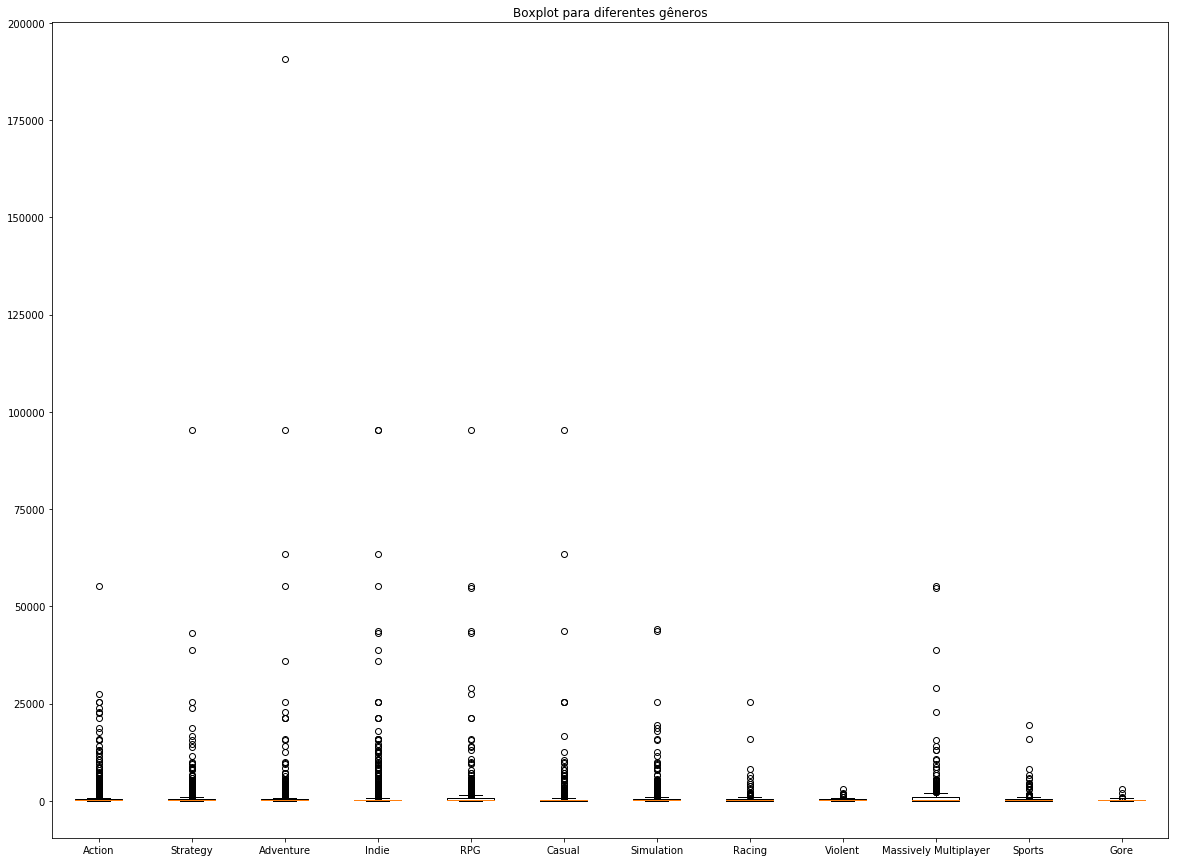

In [109]:
t_medio = excel_only_jogos
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros')
ax.boxplot(data, labels = lista_generos)
plt.show()

# Log Tempo médio por gênero

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


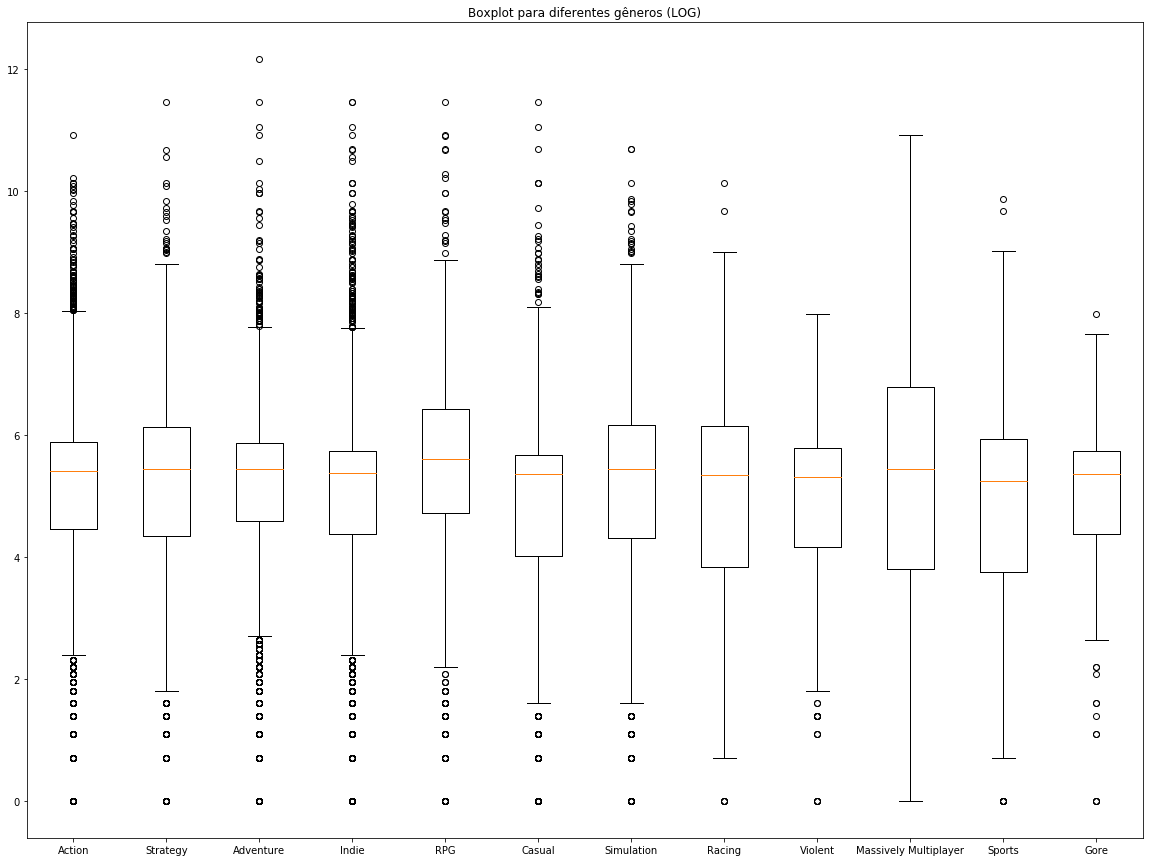

In [110]:
t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros (LOG)')
ax.boxplot(data, labels = lista_generos)
plt.show()

# Tempo de jogo médio por gênero:

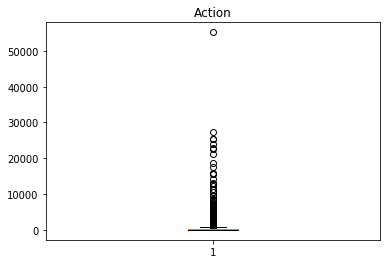

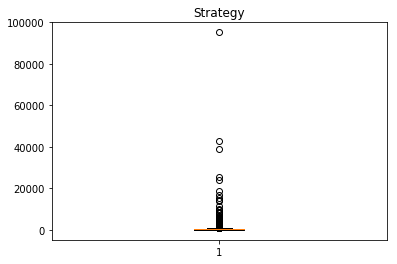

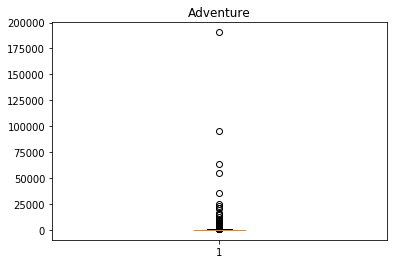

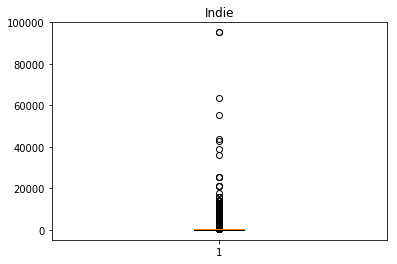

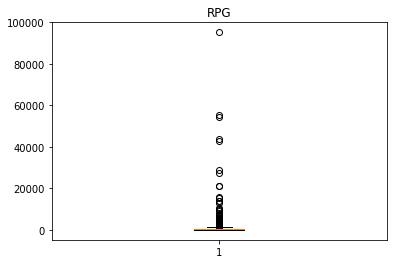

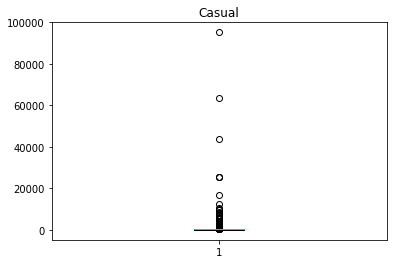

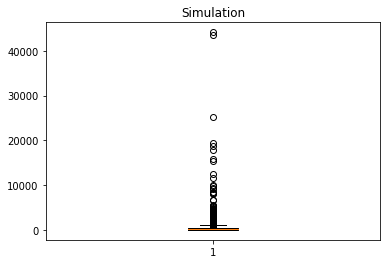

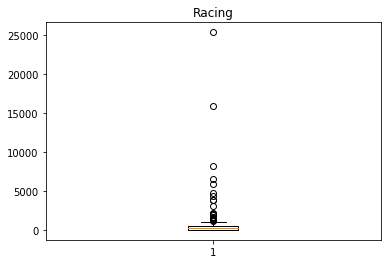

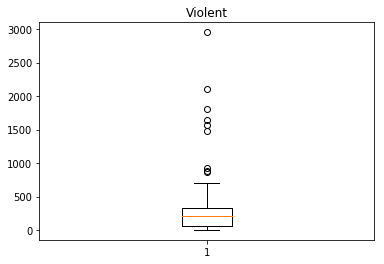

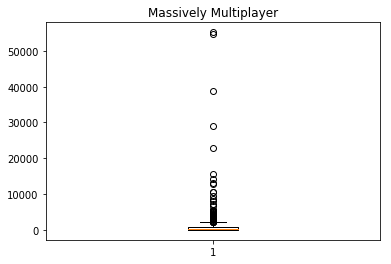

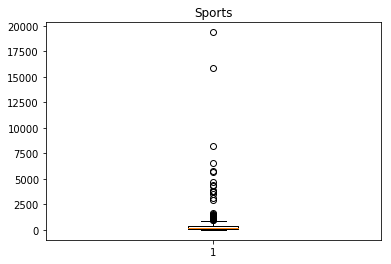

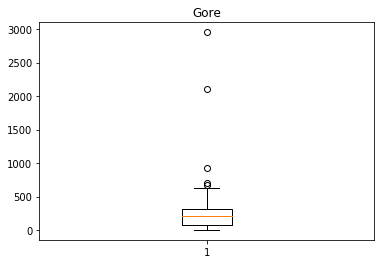

In [111]:
for i in lista_generos:
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime)
    plt.title(i)
    plt.show()

# Log Tempo de jogo médio por gênero:

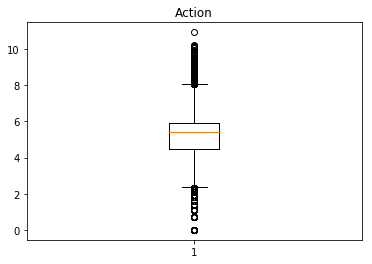

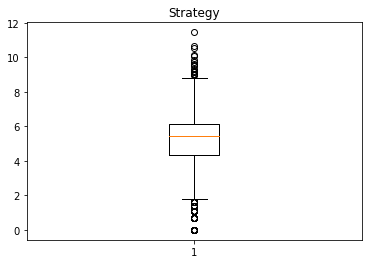

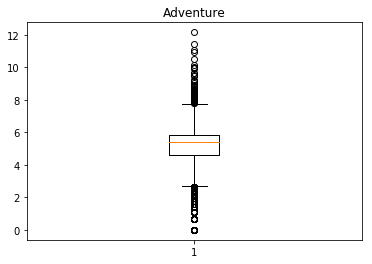

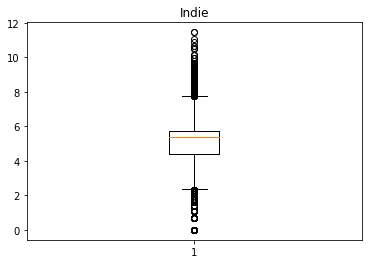

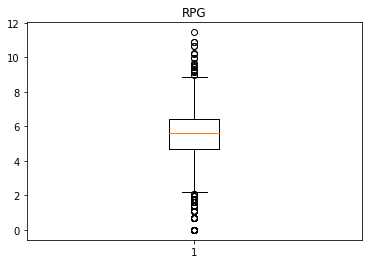

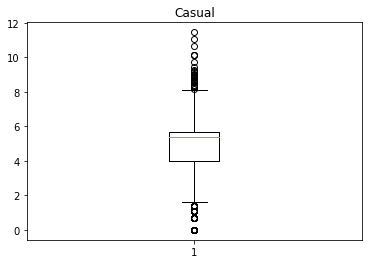

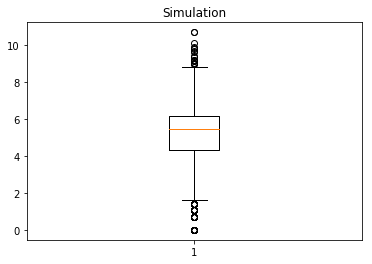

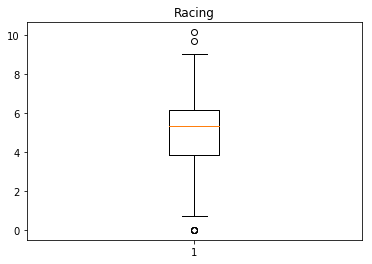

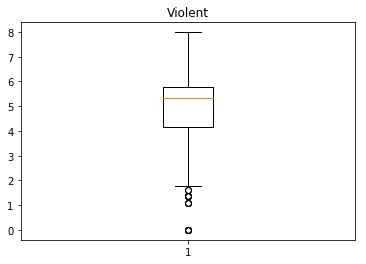

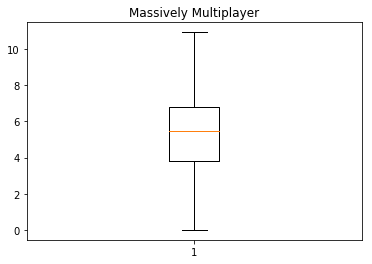

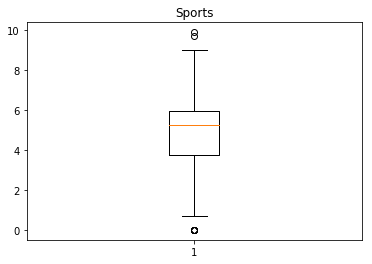

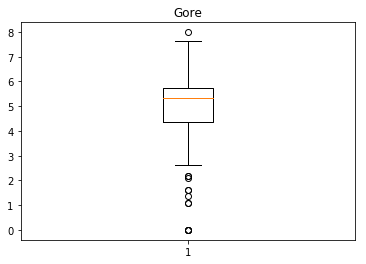

In [112]:
for i in lista_generos:
    
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime)
    plt.title(i)
    plt.show()

# Jogadores por gênero

In [113]:
faixas = []
intervalo = []
jogadores=excel_only_jogos
valores = jogadores.owners.unique()
for i in valores:
    intervalo = i
    intervalo = intervalo.split("-")
    faixas.append(intervalo[0])
    faixas.append(intervalo[-1])
faixas = list(map(int, set(faixas)))
faixas.sort()

In [114]:
compradores = []

for i in excel_only_jogos.owners:
#     print(i)
    
    if i == "0-20000":
        compradores.append(np.log10(10000))
    elif i == '200000-500000':
        compradores.append(np.log10(350000))
    elif i == '1000000-2000000':
        compradores.append(np.log10(1500000))
    elif i == '50000-100000':
        compradores.append(np.log10(75000))
    elif i == '100000-200000':
        compradores.append(np.log10(150000))
    elif i == '500000-1000000':
        compradores.append(np.log10(750000))
    elif i == '20000-50000':
        compradores.append(np.log10(35000))
    elif i == '50000000-100000000':
        compradores.append(np.log10(75000000))
    elif i == '100000000-200000000':
        compradores.append(np.log10(150000000))
    elif i == '20000000-50000000':
        compradores.append(np.log10(35000000))
    elif i == '2000000-5000000':
        compradores.append(np.log10(3500000))
    elif i == '10000000-20000000':
        compradores.append(np.log10(15000000))
    else:
        compradores.append(np.log10(7500000))
excel_only_jogos["compradores"] = compradores

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [115]:
excel_only_jogos.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Percent_negative,Percent_positive,n_cat,Idade,ratings,per_rating,log_average_playtime,compradores
count,6.170000e+03,6170.000000,6170.000000,6170.000000,6.170000e+03,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6.170000e+03,6170.000000,6170.000000,6170.000000
mean,4.000430e+05,0.992707,0.896110,46.662723,4.181495e+03,858.130470,657.369368,640.918476,7.472110,0.261752,0.738248,4.362075,3.982496,5.039625e+03,0.738248,5.034353,5.114387
std,2.064139e+05,0.085096,3.791545,276.124639,3.961343e+04,8945.578447,3783.666030,4898.936256,8.503212,0.177057,0.177057,2.438583,2.641616,4.678293e+04,0.177057,1.765952,0.682159
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000,4.000000
25%,2.659500e+05,1.000000,0.000000,0.000000,1.060000e+02,38.000000,77.000000,77.000000,1.590000,0.120461,0.631660,3.000000,2.000000,1.640000e+02,0.631660,4.343805,4.544068
50%,3.887050e+05,1.000000,0.000000,15.000000,4.080000e+02,113.000000,222.000000,228.000000,4.990000,0.222222,0.777778,4.000000,3.000000,5.530000e+02,0.777778,5.402677,5.176091
75%,5.395950e+05,1.000000,0.000000,35.000000,1.704750e+03,365.000000,365.000000,371.000000,10.990000,0.368340,0.879539,6.000000,5.000000,2.142500e+03,0.879539,5.899897,5.544068
max,1.051310e+06,1.000000,18.000000,5000.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,114.990000,1.000000,1.000000,17.000000,22.000000,3.046717e+06,1.000000,12.158063,8.176091


In [116]:
excel_only_jogos.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Percent_negative,Percent_positive,n_cat,Idade,ratings,per_rating,log_average_playtime,compradores
appid,1.000000,-0.125885,-0.104189,0.095033,-0.078915,-0.038760,-0.015783,0.000530,-0.063853,0.120422,-0.120422,-0.047602,-0.857746,-0.074233,-0.120422,-0.119806,-0.447546
english,-0.125885,1.000000,0.020260,0.005856,0.006074,0.005969,-0.022500,-0.029326,0.001524,0.008055,-0.008055,0.050223,0.072986,0.006285,-0.008055,-0.000027,0.042948
required_age,-0.104189,0.020260,1.000000,-0.002019,0.065550,0.063035,0.021488,0.001058,0.207173,-0.047811,0.047811,0.047163,0.074283,0.067557,0.047811,0.113561,0.212332
achievements,0.095033,0.005856,-0.002019,1.000000,0.015860,0.008973,0.037477,0.026147,-0.015372,0.020612,-0.020612,0.027813,-0.067357,0.015145,-0.020612,-0.009720,-0.024625
positive_ratings,-0.078915,0.006074,0.065550,0.015860,1.000000,0.761073,0.146445,0.025656,0.050823,-0.067362,0.067362,0.090164,0.050904,0.992278,0.067362,0.146133,0.230246
negative_ratings,-0.038760,0.005969,0.063035,0.008973,0.761073,1.000000,0.151003,0.038905,0.080740,0.007191,-0.007191,0.056076,0.004751,0.835653,-0.007191,0.133897,0.201941
average_playtime,-0.015783,-0.022500,0.021488,0.037477,0.146445,0.151003,1.000000,0.914046,0.068159,-0.033726,0.033726,0.021885,-0.005688,0.152877,0.033726,0.315555,0.085741
median_playtime,0.000530,-0.029326,0.001058,0.026147,0.025656,0.038905,0.914046,1.000000,0.050047,-0.019249,0.019249,-0.002618,-0.013921,0.029163,0.019249,0.240628,0.024155
price,-0.063853,0.001524,0.207173,-0.015372,0.050823,0.080740,0.068159,0.050047,1.000000,-0.183404,0.183404,0.235624,-0.039858,0.058473,0.183404,0.280856,0.133556
Percent_negative,0.120422,0.008055,-0.047811,0.020612,-0.067362,0.007191,-0.033726,-0.019249,-0.183404,1.000000,-1.000000,-0.169724,-0.121331,-0.055664,-1.000000,-0.123321,-0.172541


In [117]:
jogadores.dropna()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price,Percent_negative,Percent_positive,positivo,n_cat,Idade,ratings,per_rating,log_average_playtime,compradores
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,7.19,0.026112,0.973888,Muito positivo,4.0,19,127873,0.973888,9.776336,7.176091
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3.99,0.160213,0.839787,Muito positivo,4.0,20,3951,0.839787,5.624018,6.875061
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,3.99,0.104352,0.895648,Muito positivo,2.0,16,3814,0.895648,5.231109,6.875061
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3.99,0.173377,0.826623,Muito positivo,4.0,18,1540,0.826623,5.552960,6.875061
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,3.99,0.052004,0.947996,Muito positivo,3.0,20,5538,0.947996,6.436150,6.875061
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,3.99,0.198722,0.801278,Muito positivo,3.0,19,3442,0.801278,5.164786,6.875061
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,7.19,0.038122,0.961878,Muito positivo,5.0,21,28855,0.961878,7.170120,6.875061
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,7.19,0.106129,0.893871,Muito positivo,3.0,15,13559,0.893871,6.056784,7.176091
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,3.99,0.099010,0.900990,Muito positivo,1.0,18,4242,0.900990,5.888878,6.875061
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,7.19,0.034399,0.965601,Muito positivo,7.0,15,70321,0.965601,6.538140,7.176091


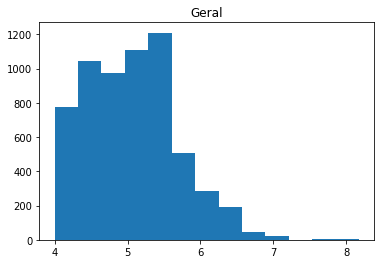

In [118]:
plt.hist(jogadores.compradores, bins=13)
plt.title("Geral")
plt.show()

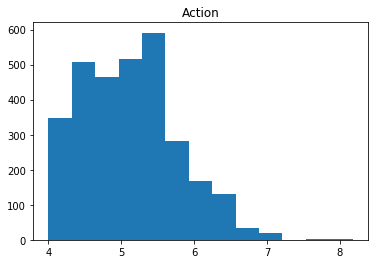

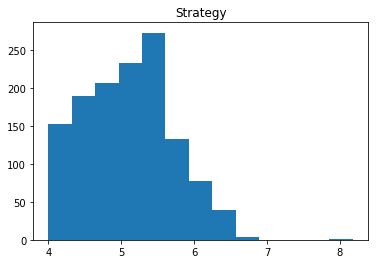

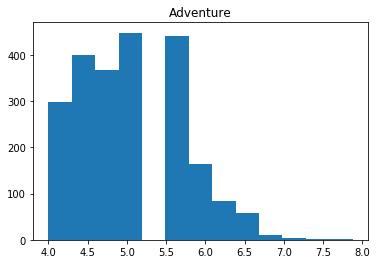

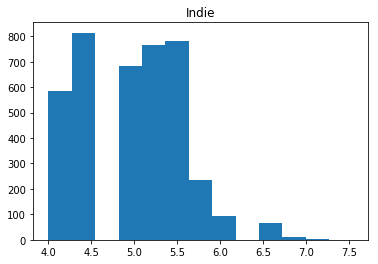

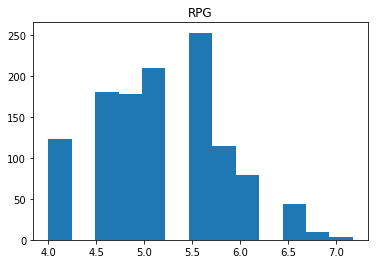

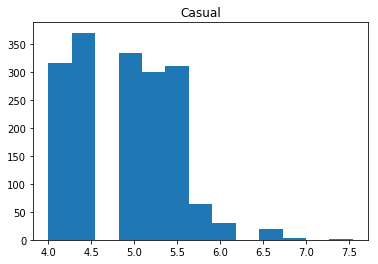

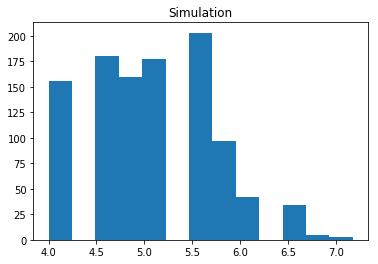

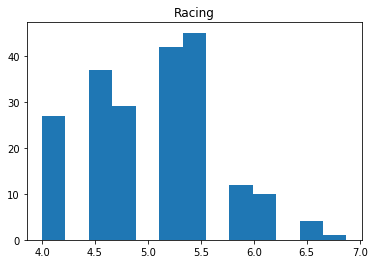

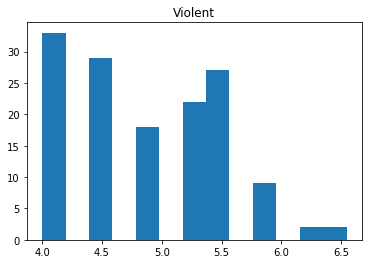

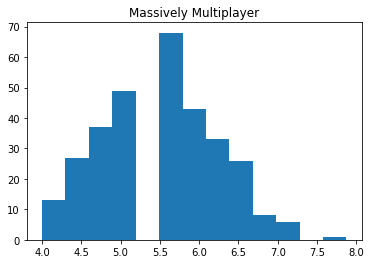

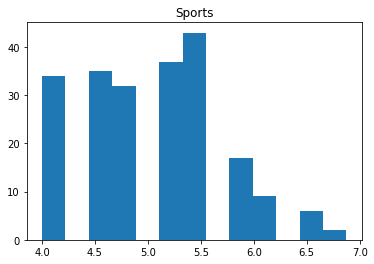

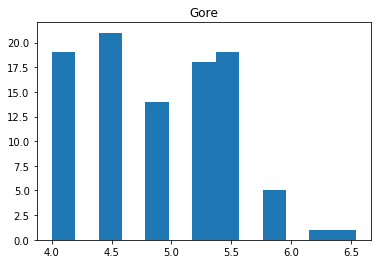

In [119]:
for i in lista_generos:
    plt.hist(jogadores.loc[jogadores.genres.str.contains(i)].compradores, bins = 13)
    plt.title(i)
    plt.show()

# Separando Variáveis em grupos

Jutando variáveis que demonstram uma mesma qualidade em grupos

In [120]:
excel_only_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,price,Percent_negative,Percent_positive,positivo,n_cat,Idade,ratings,per_rating,log_average_playtime,compradores
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,7.19,0.026112,0.973888,Muito positivo,4.0,19,127873,0.973888,9.776336,7.176091
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3.99,0.160213,0.839787,Muito positivo,4.0,20,3951,0.839787,5.624018,6.875061
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,3.99,0.104352,0.895648,Muito positivo,2.0,16,3814,0.895648,5.231109,6.875061
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3.99,0.173377,0.826623,Muito positivo,4.0,18,1540,0.826623,5.552960,6.875061
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,3.99,0.052004,0.947996,Muito positivo,3.0,20,5538,0.947996,6.436150,6.875061
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,3.99,0.198722,0.801278,Muito positivo,3.0,19,3442,0.801278,5.164786,6.875061
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,7.19,0.038122,0.961878,Muito positivo,5.0,21,28855,0.961878,7.170120,6.875061
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,7.19,0.106129,0.893871,Muito positivo,3.0,15,13559,0.893871,6.056784,7.176091
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,3.99,0.099010,0.900990,Muito positivo,1.0,18,4242,0.900990,5.888878,6.875061
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,7.19,0.034399,0.965601,Muito positivo,7.0,15,70321,0.965601,6.538140,7.176091


### Tempo de jogo

In [121]:
excel_only_jogos.loc[:,["name","average_playtime","median_playtime"]]

,name,average_playtime,median_playtime
0,Counter-Strike,17612,317
1,Team Fortress Classic,277,62
2,Day of Defeat,187,34
3,Deathmatch Classic,258,184
4,Half-Life: Opposing Force,624,415
5,Ricochet,175,10
6,Half-Life,1300,83
7,Counter-Strike: Condition Zero,427,43
8,Half-Life: Blue Shift,361,205
9,Half-Life 2,691,402


### Ratings

In [122]:
excel_only_jogos.loc[:,["name", "positive_ratings", "negative_ratings", "ratings", "per_rating"]]

,name,positive_ratings,negative_ratings,ratings,per_rating
0,Counter-Strike,124534,3339,127873,0.973888
1,Team Fortress Classic,3318,633,3951,0.839787
2,Day of Defeat,3416,398,3814,0.895648
3,Deathmatch Classic,1273,267,1540,0.826623
4,Half-Life: Opposing Force,5250,288,5538,0.947996
5,Ricochet,2758,684,3442,0.801278
6,Half-Life,27755,1100,28855,0.961878
7,Counter-Strike: Condition Zero,12120,1439,13559,0.893871
8,Half-Life: Blue Shift,3822,420,4242,0.900990
9,Half-Life 2,67902,2419,70321,0.965601


### Preço

In [123]:
excel_only_jogos.loc[:,["name", "price"]]

,name,price
0,Counter-Strike,7.19
1,Team Fortress Classic,3.99
2,Day of Defeat,3.99
3,Deathmatch Classic,3.99
4,Half-Life: Opposing Force,3.99
5,Ricochet,3.99
6,Half-Life,7.19
7,Counter-Strike: Condition Zero,7.19
8,Half-Life: Blue Shift,3.99
9,Half-Life 2,7.19


### Identificação

In [124]:
excel_only_jogos.loc[:,["name", "developer", "publisher", "release_date","platforms", "required_age", "genres", "categories", "n_cat"]]

,name,developer,publisher,release_date,platforms,required_age,genres,categories,n_cat
0,Counter-Strike,Valve,Valve,2000-11-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
1,Team Fortress Classic,Valve,Valve,1999-04-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
2,Day of Defeat,Valve,Valve,2003-05-01,windows;mac;linux,0,Action,Multi-player;Valve Anti-Cheat enabled,2.0
3,Deathmatch Classic,Valve,Valve,2001-06-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
4,Half-Life: Opposing Force,Gearbox Software,Valve,1999-11-01,windows;mac;linux,0,Action,Single-player;Multi-player;Valve Anti-Cheat en...,3.0
5,Ricochet,Valve,Valve,2000-11-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Valve Anti-Ch...,3.0
6,Half-Life,Valve,Valve,1998-11-08,windows;mac;linux,0,Action,Single-player;Multi-player;Online Multi-Player...,5.0
7,Counter-Strike: Condition Zero,Valve,Valve,2004-03-01,windows;mac;linux,0,Action,Single-player;Multi-player;Valve Anti-Cheat en...,3.0
8,Half-Life: Blue Shift,Gearbox Software,Valve,2001-06-01,windows;mac;linux,0,Action,Single-player,1.0
9,Half-Life 2,Valve,Valve,2004-11-16,windows;mac;linux,0,Action,Single-player;Steam Achievements;Steam Trading...,7.0


### Compradores

In [125]:
excel_only_jogos.loc[:, ["name", "owners"]]

,name,owners
0,Counter-Strike,10000000-20000000
1,Team Fortress Classic,5000000-10000000
2,Day of Defeat,5000000-10000000
3,Deathmatch Classic,5000000-10000000
4,Half-Life: Opposing Force,5000000-10000000
5,Ricochet,5000000-10000000
6,Half-Life,5000000-10000000
7,Counter-Strike: Condition Zero,10000000-20000000
8,Half-Life: Blue Shift,5000000-10000000
9,Half-Life 2,10000000-20000000


### Plot dos scatters do Preço com o Percent_Positive (Feedback)

A correlação entre  é de 0.183404369579


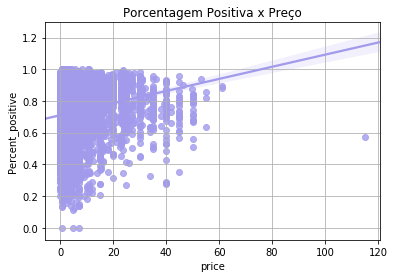

In [126]:
sns.regplot(excel_only_jogos["price"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['price'].corr(excel_only_jogos['Percent_positive']))
plt.show()

### Plot dos scatters do n_cat com o Percent_Positive (Feedback)

A correlação entre  é de 0.169723596015


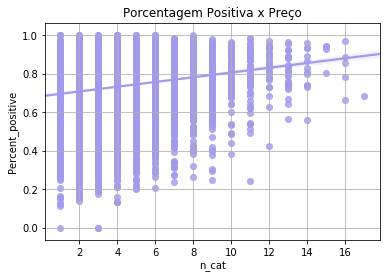

In [127]:
sns.regplot(excel_only_jogos["n_cat"], excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['n_cat'].corr(excel_only_jogos['Percent_positive']))
plt.show()

### Plot dos scatters do log_average_playtime com o Percent_Positive (Feedback)

A correlação entre  é de 0.0337261738106


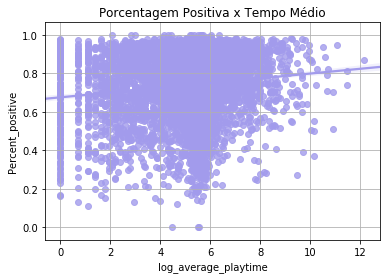

In [128]:
sns.regplot(excel_only_jogos["log_average_playtime"], excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Tempo Médio")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['average_playtime'].corr(excel_only_jogos['Percent_positive']))
plt.show()

### Plot dos scatters do log_median_playtime com o Percent_Positive (Feedback)

A correlação entre  é de 0.111836079996


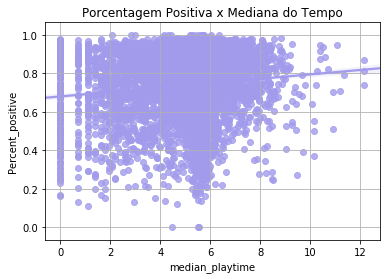

In [129]:
sns.regplot(np.log(excel_only_jogos["median_playtime"]),excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Mediana do Tempo")
plt.grid(True)
print('A correlação entre  é de', np.log(excel_only_jogos["median_playtime"]).corr(excel_only_jogos['Percent_positive']))
plt.show()

# Regressão linear

De acordo com os scatters, percebe-se que as variaveis median_playtime e average_playtime não tem uma boa correlação. Mostraremos isso através dos testes a seguir:

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
excel_only_jogos = excel_only_jogos.dropna()
X_num1 = excel_only_jogos[["price", "n_cat"]]
y = excel_only_jogos["Percent_positive"]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [131]:
reg.coef_

array([ 0.00311938,  0.00977042])

In [132]:
reg.intercept_

0.67160571470378305

In [133]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.049947384738480261

In [134]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.170422611809


### Adicionando variáveis constando tempo de jogo

In [135]:
X_num1 = excel_only_jogos[["price", "n_cat", "average_playtime", "median_playtime"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [136]:
reg.coef_

array([  2.98547309e-03,   9.77069879e-03,   2.93763677e-06,
        -1.54908640e-06])

In [137]:
reg.intercept_

0.67391999001457425

In [138]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.050494320248840381

In [139]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.176596733047


### Removendo a variável de preço

In [140]:
X_num1 = excel_only_jogos[["n_cat", "average_playtime", "median_playtime"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [141]:
reg.coef_

array([  1.30049503e-02,   3.29709783e-06,  -1.79910589e-06])

In [142]:
reg.intercept_

0.67982604259138035

In [143]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.01464309196407021

In [144]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.174333740557


### Removendo a variável de categorias

In [145]:
X_num1 = excel_only_jogos[["average_playtime", "median_playtime", "price"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)

In [146]:
reg.coef_

array([  4.35941482e-06,  -2.99210192e-06,   3.76806366e-03])

In [147]:
reg.intercept_

0.70959992693200269

In [148]:
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.028815191335099799

In [149]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.182941038547


Como previsto pela tabela de correlações, nenhuma das variáveis jogo não alteram o resultado em um nível significante por justamente não haver correlação com a variável de saída.

# RandomForestRegressor

In [178]:
from sklearn.ensemble import RandomForestRegressor

X_num1 = excel_only_jogos[["price", "n_cat"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg_ff = RandomForestRegressor(n_estimators=100, random_state=42)
reg_ff.fit(X_train, y_train)
y_pred = reg_ff.predict(X_test)
reg_ff.score(X_test, y_test)

0.059975357656212425

In [179]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.171111435364


### Adicionando variáveis constando tempo de jogo

Como é possível observar, para o RandomForestRegressor também não fazem diferença as variáveis de análise, pois obtemos, em geral, os mesmo resultados quando fazemos uma combinatória entre elas.

In [180]:
X_num1 = excel_only_jogos[["price", "n_cat", "average_playtime", "median_playtime"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg_ff = RandomForestRegressor(n_estimators=100, random_state=42)
reg_ff.fit(X_train, y_train)
y_pred = reg_ff.predict(X_test)
reg_ff.score(X_test, y_test)

0.057896975043900671

In [181]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.173046063775


### Removendo a variável de preço

In [182]:
X_num1 = excel_only_jogos[["n_cat", "average_playtime", "median_playtime"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)
reg_ff = RandomForestRegressor(n_estimators=100, random_state=42)
reg_ff.fit(X_train, y_train)
y_pred = reg_ff.predict(X_test)
reg_ff.score(X_test, y_test)

-0.086645774311216339

In [183]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.187360712136


# Regressão Polinomial

In [255]:
from sklearn.preprocessing import PolynomialFeatures

X_num1 = excel_only_jogos[["price"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)

y = excel_only_jogos["Percent_positive"]
pol_reg = PolynomialFeatures(degree=6) #determinando quantos graus nossa função terá
x_train = PolynomialFeatures(degree=6).fit_transform(X_train)
x_test = PolynomialFeatures(degree=6).fit_transform(X_test)
model = LinearRegression().fit(x_train, y_train) #criando novo modelo a partir dos dados transformados anteriormente
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.060672754305984948

In [256]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.175297948304


In [250]:
X_num1 = excel_only_jogos[["average_playtime", "median_playtime"]]
X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)

y = excel_only_jogos["Percent_positive"]
pol_reg = PolynomialFeatures(degree=2) #determinando quantos graus nossa função terá
x_train = PolynomialFeatures(degree=2).fit_transform(X_train)
x_test = PolynomialFeatures(degree=2).fit_transform(X_test)
model = LinearRegression().fit(x_train, y_train) #criando novo modelo a partir dos dados transformados anteriormente
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.052742850627188642

In [251]:
print('R²:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R²: 0.174423160244
